# Image Classfication using Tensorflow on Parkinsons Disease dataset 

## 1. Importing and Installing Dependencies 

In [ ]:
pip install tensorflow conda-forge cudatoolkit==11.2 cudnn==8.1.0 opencv-python matplotlib

In [20]:
import tensorflow as tf
import os

## 2.1 Data Pipeline PreRequisites


In [25]:
import cv2
import matplotlib.pyplot as plt

In [35]:
data_dir = 'data'

In [36]:
os.listdir(data_dir)

['healthy', 'parkinson']

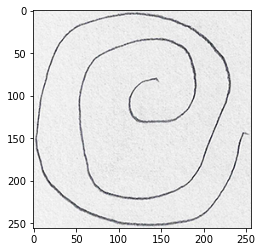

In [38]:
#reading an image
img = cv2.imread(os.path.join(data_dir,'healthy','V01HE01.png'))
img.shape
#displaying Image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

## 2.2 Load Data

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 102 files belonging to 2 classes.


In [104]:
data_iterator = data.as_numpy_iterator()

In [110]:
#get another batch
batch = data_iterator.next()

In [106]:
#images as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [107]:
#image labels
batch[1]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

### Labels
#### Class 0 - Healthy  and    Class 1 - Parkinsons

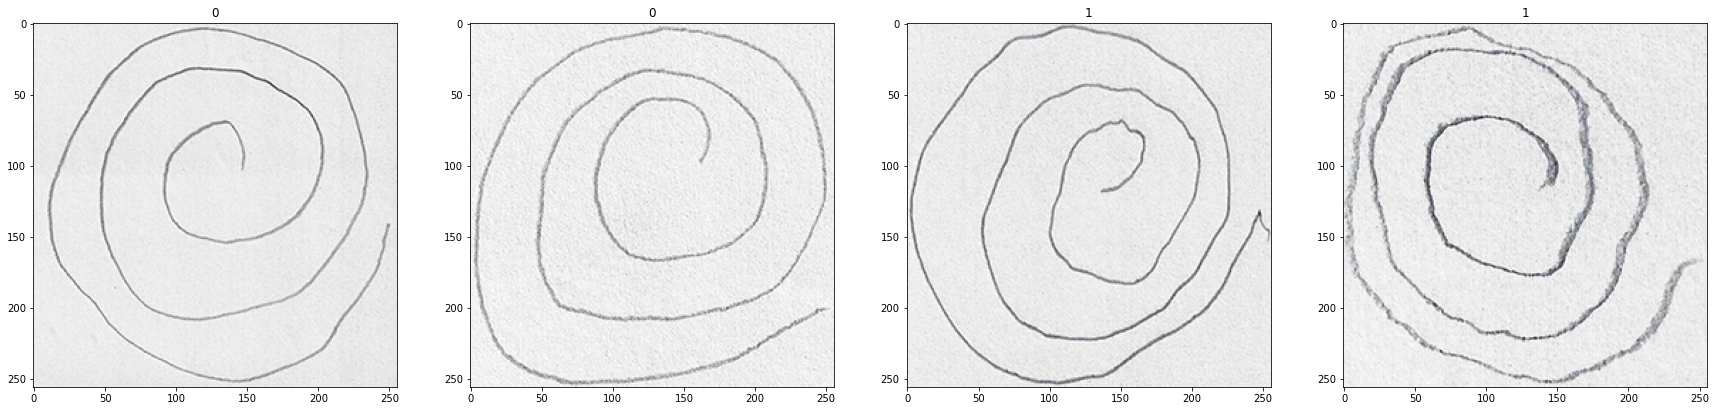

In [111]:
#Displaying a batch of pictures with the label - 
fig ,ax = plt.subplots(ncols=4 ,figsize=(30,30))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [128]:
#trial to understand scaling
scaled = batch[0]/255


In [129]:
scaled.max()

0.003921569

## 3. Preprocessing Data

### 3.1 data scaling

In [118]:
data = data.map(lambda x, y:(x/255, y))

In [119]:
scaled_iterator = data.as_numpy_iterator()

In [139]:
batch = scaled_iterator.next()

In [126]:
print(batch[0].min(),batch[0].max())


0.0 1.0


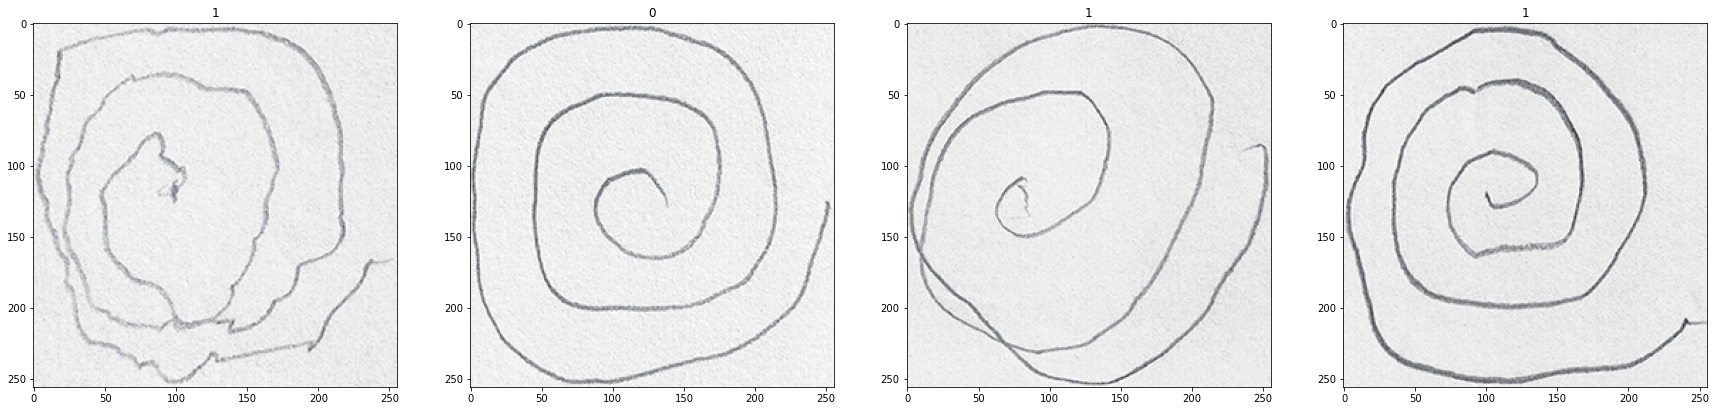

In [140]:
#Displaying a batch of pictures with the label - 
fig ,ax = plt.subplots(ncols=4 ,figsize=(30,30))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 4. Splitting Dataset

In [130]:
len(data)

4

In [134]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [136]:
train_size

2

In [135]:
val_size

1

In [137]:
test_size

1

In [138]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 5. Deep Learning Model 

### 5.1 building the network

In [141]:
#dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [142]:
model = Sequential()

In [143]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [144]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [145]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 5.2 Train

In [146]:
logdir='logs'

In [147]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [149]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 0.6800 - accuracy: 0.5156 - val_loss: 0.6746 - val_accuracy: 0.5312
Epoch 2/50
2/2 [==============================] - 2s 925ms/step - loss: 0.6815 - accuracy: 0.6094 - val_loss: 0.6666 - val_accuracy: 0.5625
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.6818 - accuracy: 0.5156 - val_loss: 0.6624 - val_accuracy: 0.5625
Epoch 4/50
2/2 [==============================] - 2s 960ms/step - loss: 0.6724 - accuracy: 0.5000 - val_loss: 0.6505 - val_accuracy: 0.8750
Epoch 5/50
2/2 [==============================] - 2s 918ms/step - loss: 0.6512 - accuracy: 0.6562 - val_loss: 0.6354 - val_accuracy: 0.5938
Epoch 6/50
2/2 [==============================] - 2s 865ms/step - loss: 0.6873 - accuracy: 0.4844 - val_loss: 0.6301 - val_accuracy: 0.7500
Epoch 7/50
2/2 [==============================] - 2s 869ms/step - loss: 0.6293 - accuracy: 0.7812 - val_loss: 0.6151 - val_accuracy: 0.7188
Epoch 8/50
2/2 [==========

### 5.3 Data visualization of loss and accuracy

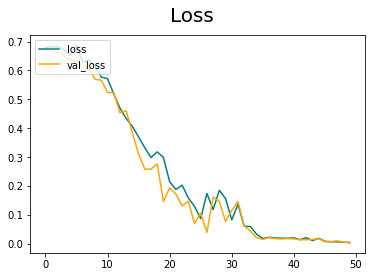

In [150]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

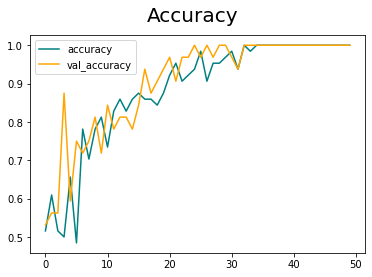

In [151]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 6. Evaulate Performance

### 6.1 Evaulate

In [152]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [153]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [155]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    
    

1/1 [==============================] - 0s 49ms/step


In [160]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### 6.2 Test

In [161]:
#dependecies
import cv2

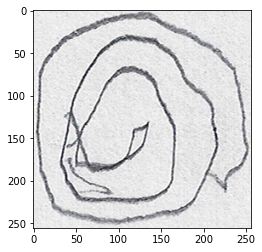

In [180]:
img = cv2.imread('test_img_parkinsons.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

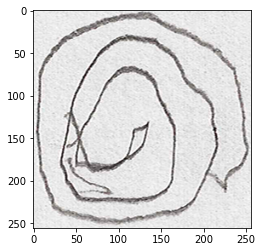

In [181]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [182]:
yhat1 = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 27ms/step


In [183]:
yhat1

array([[0.9999788]], dtype=float32)

In [184]:
if yhat1 > 0.5:
    print('Predicted class is Parkinsons')
else:
    print('Predicted class is Healthy')

predicted class is parkinsons


### 7. Saving Model

In [185]:
from tensorflow.keras.models import load_model

In [186]:
model.save(os.path.join('models','parkinsons_detection.h5'))

In [187]:
os.path.join('models','parkinsons_detection.h5')

'models\\parkinsons_detection.h5'

In [188]:
new_model = load_model(os.path.join('models','parkinsons_detection.h5'))

In [191]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 25ms/step


In [192]:
if yhatnew > 0.5:
    print('Predicted class is Parkinsons')
else:
    print('Predicted class is Healthy')

Predicted class is Parkinsons


# Successfully Classified Spiral Images using Tensorflow for Parkinson's Disease Prediction 